Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings (action ="ignore")

Load the DataSet

In [2]:
df=pd.read_csv("C:\\Users\\Vishu Rawat\\Documents\DA_Visuals\Cleanes_Startup.csv",encoding='unicode_escape')

In [3]:
df.shape

(3044, 10)

In [4]:
df.describe(include="all")

,ï»¿Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044.000000,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,NaN,1035,2459,821,1942,112,2412,55,471,72
top,NaN,02-02-2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,NaN,11,8,941,11,700,39,1356,165,175
mean,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,878.871435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿Sr No           3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


Data Cleaning

In [6]:
df=df.drop(["Remarks","ï»¿Sr No"],axis=1)

In [7]:
df.rename(columns={"Date dd/mm/yyyy":"Date"},inplace = True)

In [8]:
df.rename(columns={"City  Location":"City Location"},inplace=True)

In [9]:
df.Date.isnull().sum()

0

In [10]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst = True ,format = "%d-%m-%Y",errors ="coerce")

In [11]:
df.Date.isnull().sum()

8

In [12]:
df.Date.dtype

dtype('<M8[ns]')

In [13]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,2020-01-09,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [14]:
df.dropna(subset =["Date"],axis=0,inplace=True)

In [15]:
df["Year"]=df["Date"].dt.year.astype(int)
df["Month"]=df["Date"].dt.month.astype(int)
df["Day"]=df["Date"].dt.day.astype(int)

In [16]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Day
0,2020-01-09,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",2020,1,9


In [17]:
df.shape

(3036, 11)

Exploaratory Data Analysis

In [18]:
df["Amount in USD"].dtype

dtype('O')

In [19]:
df["Amount in USD"].isnull().sum()

959

In [20]:
#imputation
df["Amount in USD"]=df["Amount in USD"].str.replace(r"[^\d]","",regex=True)

In [21]:
#passing
df["Amount in USD"]=pd.to_numeric(df["Amount in USD"],errors ="coerce")

In [22]:
df["Amount in USD"].sum()

48604197456.0

In [23]:
df["Amount in USD"].isnull().sum()

966

In [24]:
df["Amount in USD"].fillna(df["Amount in USD"].mean(), inplace=True)

In [25]:
df["Amount in USD"].isnull().sum()

0

In [26]:
round(df["Amount in USD"].sum())

71286156269

In [27]:
# Checking the Datatype
df["Amount in USD"].dtype

dtype('float64')

In [28]:
# Converting float to String
df["Amount in USD"]=df["Amount in USD"].astype("int64")

In [29]:
df["Startup Name"]=df["Startup Name"].str.replace(r"[\\+]","",regex=True)

In [30]:
df.groupby("Startup Name")["Amount in USD"].sum()

Startup Name
"BYJU'S"           150000000
#Fame               10000000
121Policy           23480288
19th mile             180000
1Crowd              23480288
                     ...    
xc2xa0Notesgen            20
xc2xa0Nudgespot       625000
xc2xa0Satvacart           20
xc2xa0Shopsity            20
zippserv              440000
Name: Amount in USD, Length: 2453, dtype: int64

In [31]:
df[:1]

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Day
0,2020-01-09,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020,1,9


In [32]:
# Cleaning the Data
df["Startup Name"]=df["Startup Name"].astype(str).str.replace("xa0","",regex=False)
df["Startup Name"]=df["Startup Name"].astype(str).str.replace("xc2","",regex=False)
df["Startup Name"]=df["Startup Name"].astype(str).str.replace("\xa0","",regex=False)

In [33]:
df.groupby("Startup Name")["Amount in USD"].sum().reset_index()

,Startup Name,Amount in USD
0,"""BYJU'S""",150000000
1,#Fame,10000000
2,121Policy,23480288
3,19th mile,180000
4,1Crowd,23480288
...,...,...
2446,vImmune,23480288
2447,vPhrase Analytics,23480288
2448,wWhere,200000
2449,wayForward,1000000


In [34]:
df["City Location"]=df["City Location"].str.replace(r"[\\+]","",regex=True)

In [35]:
df.groupby("City Location")["Amount in USD"].sum().reset_index()

,City Location,Amount in USD
0,Agra,46960576
1,Ahemadabad,6344811
2,Ahemdabad,23480288
3,Ahmedabad,371919168
4,Amritsar,300000
...,...,...
107,xc2xa0Bangalore,2016200000
108,xc2xa0Gurgaon,225685040
109,xc2xa0Mumbai,2019350000
110,xc2xa0New Delhi,2010000020


In [36]:
# Cleaning the Dataset
df["City Location"]=df["City Location"].astype(str).str.replace("xa0","",regex=False)
df["City Location"]=df["City Location"].astype(str).str.replace("xc2","",regex=False)
df["City Location"]=df["City Location"].astype(str).str.replace("\xa0","",regex=False)

In [37]:
# Replacing the Syntax
df["City Location"]=df["City Location"].replace(["Ahemadabad","Ahmedabad"],"Ahemdabad")

In [38]:
df["City Location"].mode()[0]

'Bangalore'

In [39]:
df.groupby("City Location")["Amount in USD"].sum().reset_index()

,City Location,Amount in USD
0,Agra,46960576
1,Ahemdabad,401744267
2,Amritsar,300000
3,Andheri,5750000
4,Bangalore,19083498112
...,...,...
101,Udupi,35480288
102,Uttar Pradesh,23480288
103,Vadodara,100695152
104,Varanasi,52000


In [40]:
#Top 10 
Top = df.groupby("City Location")["Amount in USD"].sum().sort_values(ascending=False).head(10).reset_index()

In [41]:
Top

,City Location,Amount in USD
0,Bangalore,19083498112
1,Mumbai,10828882823
2,New Delhi,9254268735
3,Bengaluru,8937485287
4,Gurgaon,5804834385
5,Noida,4151634656
6,nan,2327626828
7,Pune,1431411792
8,Chennai,1235333336
9,Hyderabad,1035044006


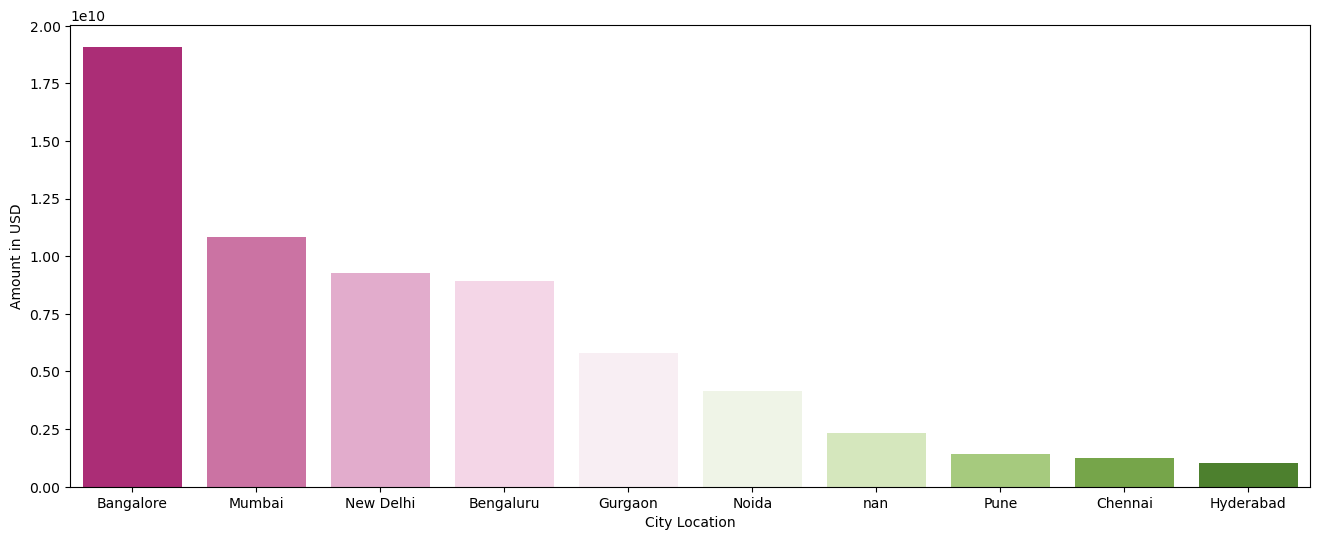

In [61]:
plt.figure(figsize = (16 , 6))

sns.barplot(x="City Location", y="Amount in USD", data=Top, palette="PiYG")

plt.title=("Top 10 Cities by Total Funding")
plt.show()

In [62]:
#most coomon industry
id=df["Industry Vertical"].value_counts().head(5).reset_index()

In [63]:
id

,Industry Vertical,count
0,Consumer Internet,940
1,Technology,478
2,eCommerce,186
3,Healthcare,70
4,Finance,62


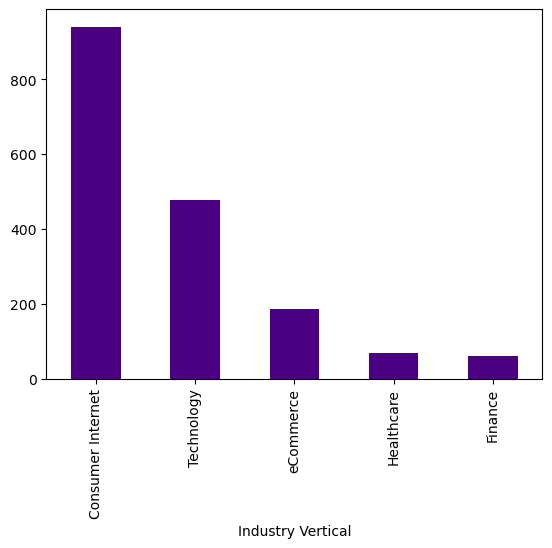

In [70]:
df["Industry Vertical"].value_counts(ascending = False).head().plot(kind = "bar" ,color= "indigo")

plt.show()

In [48]:
ip=df.groupby("InvestmentnType")["Amount in USD"].sum().sort_values(ascending=False).head(10).reset_index()


In [49]:
ip

,InvestmentnType,Amount in USD
0,Private Equity,41598500245
1,Seed Funding,15424875404
2,Series B,6295036235
3,Series D,1481799000
4,Series C,1044718394
5,Funding Round,1000000000
6,Private Equity Round,506000000
7,Seed/ Angel Funding,360590262
8,Series A,250160576
9,Seed / Angel Funding,247015766


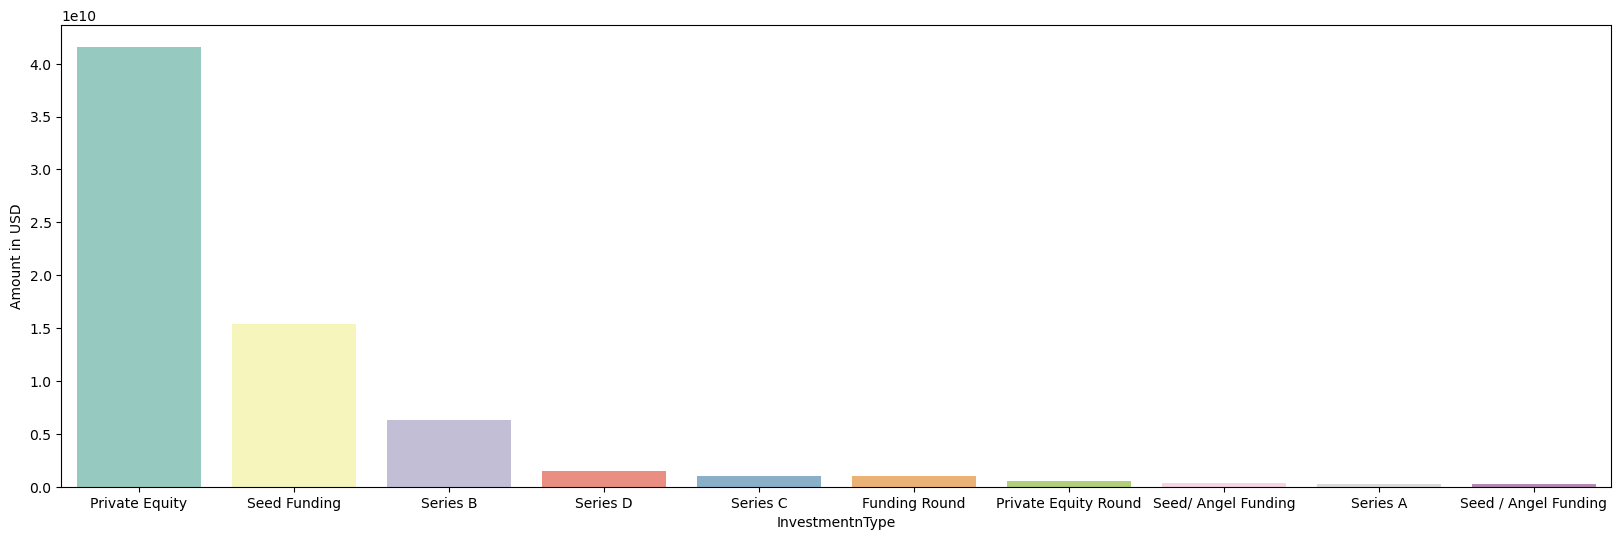

In [74]:
plt.figure(figsize=(20, 6))
sns.barplot(x='InvestmentnType', y='Amount in USD',data = ip,  palette="Set3")

plt.title=('Distribution of Funding Amounts by Investment Type')

plt.show()

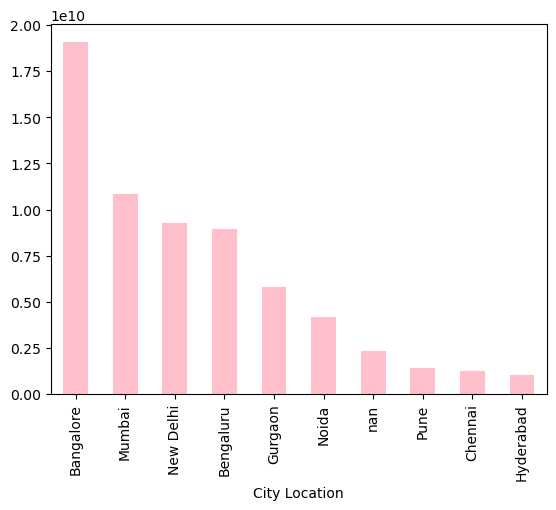

In [76]:
funding_by_city = df.groupby('City Location')['Amount in USD'].sum().sort_values(ascending=False).head(10)
funding_by_city.plot(kind='bar',color="Pink") 
plt.title=('Total Funding by City')
plt.show()

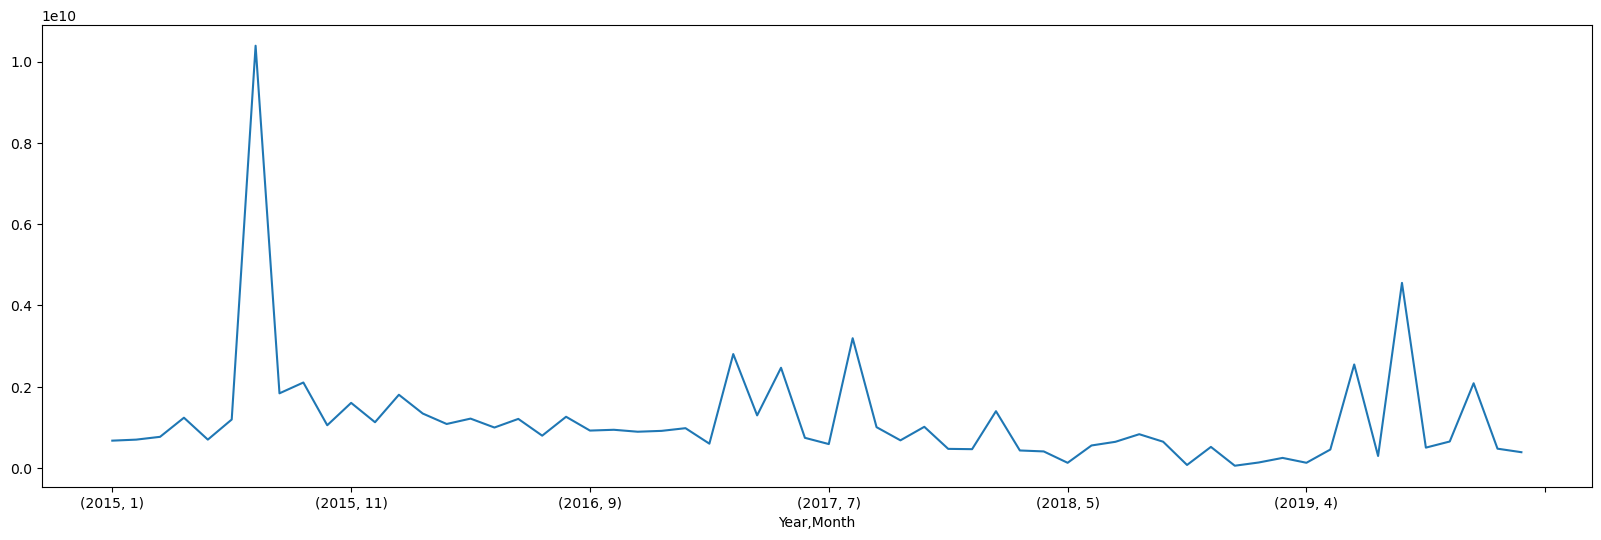

In [77]:
plt.figure(figsize=(20, 6))
monthly_funding = df.groupby(['Year','Month'])['Amount in USD'].sum()
monthly_funding.plot(kind='line')
plt.title=('Monthly Funding Trend')
plt.show()

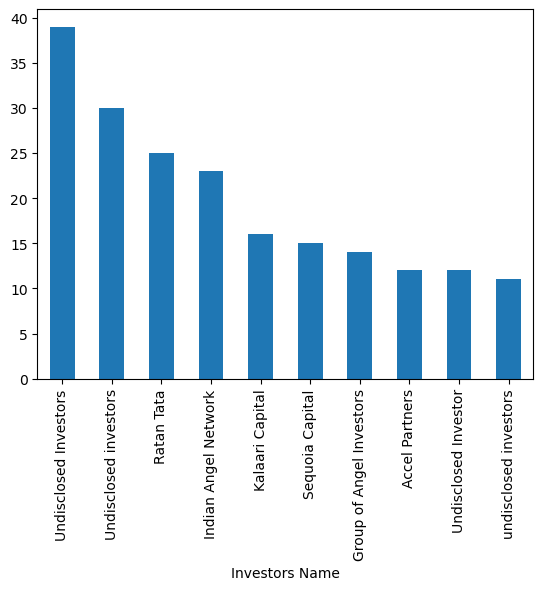

In [78]:
top_investors = df['Investors Name'].value_counts().head(10)
top_investors.plot(kind='bar')
plt.title=('Top 10 Most Active Investors')
plt.show()


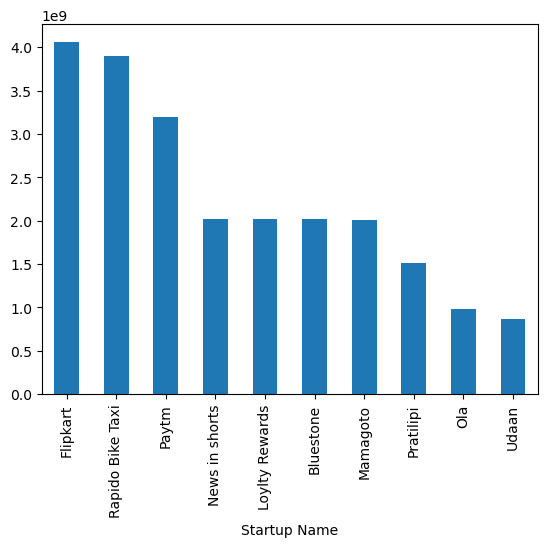

In [79]:
top_startups = df.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False).head(10)
top_startups.plot(kind='bar')

plt.show()

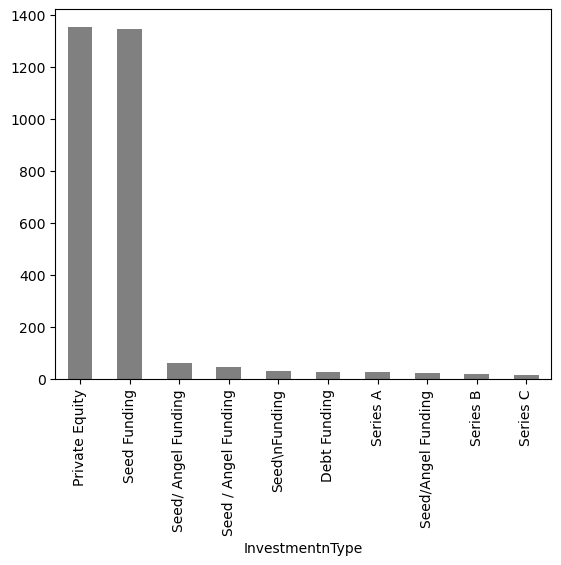

In [86]:
funding_type = df['InvestmentnType'].value_counts().head(10)
funding_type.plot(kind='bar', color="grey")
plt.show()

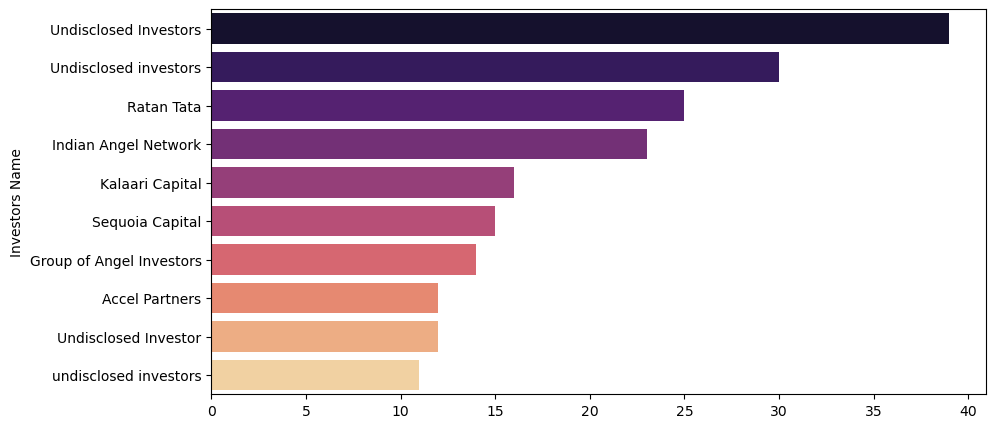

In [87]:

top_investors = df['Investors Name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_investors.values, y=top_investors.index, palette="magma")
plt.title=("Top 10 Most Active Investors")

plt.show()

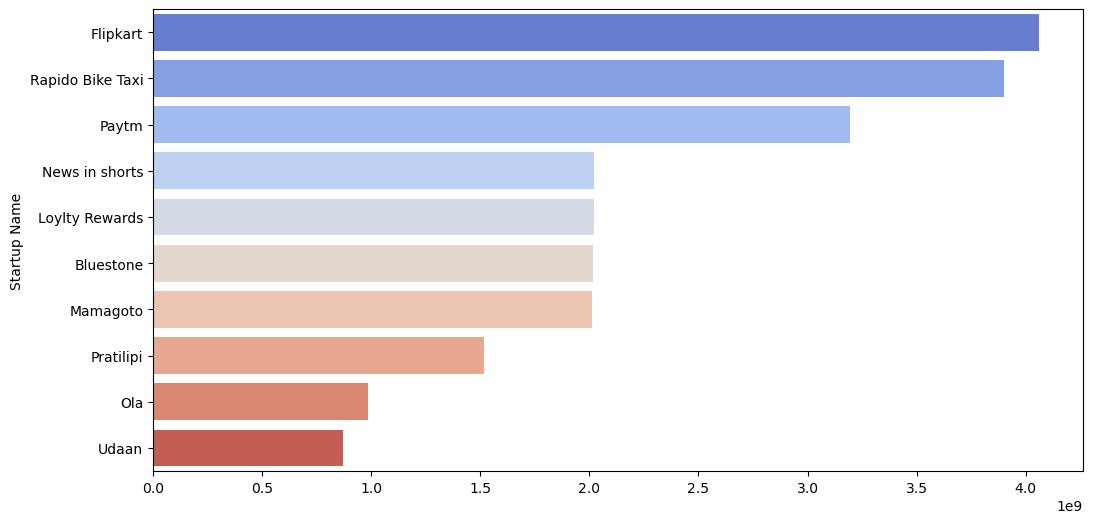

In [88]:
# 2. Top Funded Startups
top_startups = df.groupby('Startup Name')["Amount in USD"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_startups.values, y=top_startups.index, palette="coolwarm")
plt.title=("Top 10 Funded Startups")
plt.show()

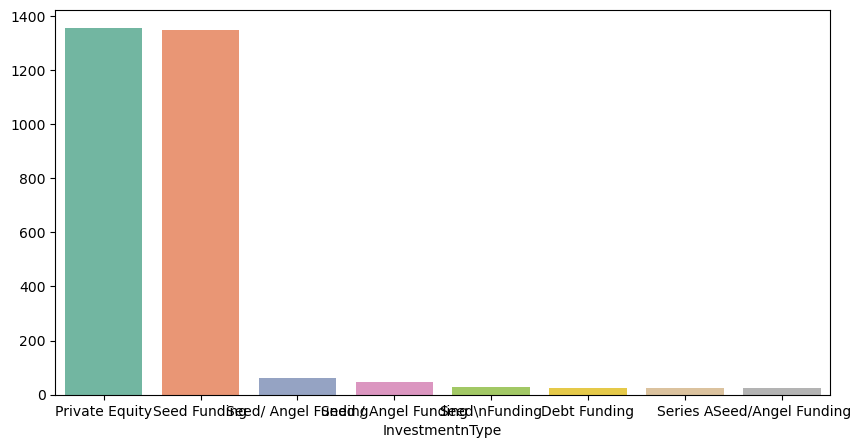

In [89]:


# 3. Funding Count by Type
funding_type = df['InvestmentnType'].value_counts().head(8)
plt.figure(figsize=(10,5))
sns.barplot(x=funding_type.index, y=funding_type.values, palette="Set2")
plt.title=("Funding Count by Investment Type")

plt.show()

In [102]:

print("Most Funded City:",Top.values[0])
print(" Most Active Investor: ", top_investors.index[0])
print(" Sector Dominating Rounds: ", df['Industry Vertical'].mode()[0])
print(" Year-wise Funding Trend:")
yearly_funding = df.groupby(df['Date'].dt.year)['Amount in USD'].sum()
display(yearly_funding)

Most Funded City: ['Bangalore' 19083498112]
 Most Active Investor:  Undisclosed Investors
 Sector Dominating Rounds:  Consumer Internet
 Year-wise Funding Trend:


Date
2015    23392482224
2016    13384565824
2017    15853256258
2018     6172731329
2019    12092912775
2020      390207254
Name: Amount in USD, dtype: int64